In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
IMAGE_SIZE = (224, 224)
train_data_dir = 'data_splitted_v2/train'  
val_data_dir = 'data_splitted_v2/val'
batch_size = 16

In [3]:
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, rotation_range=20, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical')

Found 4980 images belonging to 4 classes.
Found 1576 images belonging to 4 classes.


In [4]:
# number of images for each class in the training dataset
train_class_counts = {class_name: list(train_generator.classes).count(class_idx) 
                      for class_name, class_idx in train_generator.class_indices.items()}

print("Number of images in the training set:", train_class_counts)

# number of images for each class in the validation dataset
val_class_counts = {class_name: list(val_generator.classes).count(class_idx) 
                    for class_name, class_idx in val_generator.class_indices.items()}

print("Number of images in the validation set:", val_class_counts)


Number of images in the training set: {'Heavy damage': 1103, 'Minor damage': 1350, 'Moderate damage': 1296, 'Undamaged state': 1231}
Number of images in the validation set: {'Heavy damage': 329, 'Minor damage': 468, 'Moderate damage': 428, 'Undamaged state': 351}


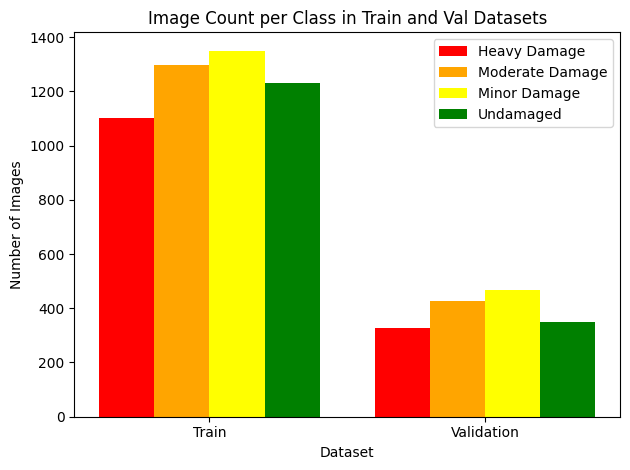

In [5]:
# visualization of classes
x_categories = ['Train', 'Validation']

heavy_damage_counts = [train_class_counts['Heavy damage'], val_class_counts['Heavy damage']]
moderate_damage_counts = [train_class_counts['Moderate damage'], val_class_counts['Moderate damage']]
minor_damage_counts = [train_class_counts['Minor damage'], val_class_counts['Minor damage']]
undamaged_counts = [train_class_counts['Undamaged state'], val_class_counts['Undamaged state']]

fig, ax = plt.subplots()

bar_width = 0.2
x = range(len(x_categories))

# Plotting each damage category side by side
ax.bar([i - bar_width * 1.5 for i in x], heavy_damage_counts, bar_width, label='Heavy Damage', color='red')
ax.bar([i - bar_width / 2 for i in x], moderate_damage_counts, bar_width, label='Moderate Damage', color='orange')
ax.bar([i + bar_width / 2 for i in x], minor_damage_counts, bar_width, label='Minor Damage', color='yellow')
ax.bar([i + bar_width * 1.5 for i in x], undamaged_counts, bar_width, label='Undamaged', color='green')

ax.set_xlabel('Dataset')
ax.set_ylabel('Number of Images')
ax.set_title('Image Count per Class in Train and Val Datasets')
ax.set_xticks(x)
ax.set_xticklabels(x_categories)
ax.legend()

plt.tight_layout()
plt.show()


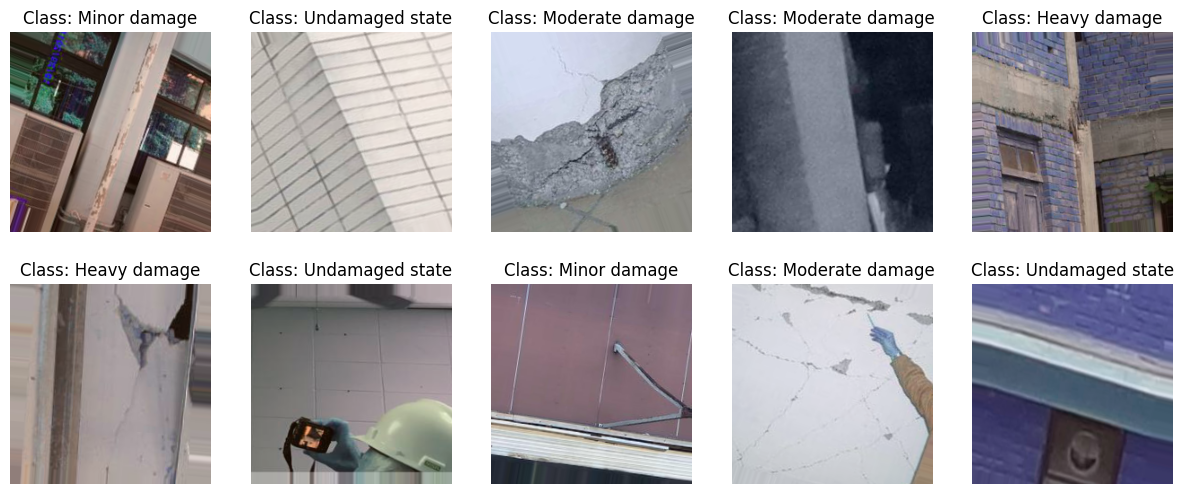

In [6]:
import matplotlib.pyplot as plt
import numpy as np

class_names = {v: k for k, v in train_generator.class_indices.items()}

images, labels = next(train_generator)

n_pictures_to_show = 10  
images_per_row = 5 
n_rows = int(np.ceil(n_pictures_to_show / images_per_row))  # number of rows needed

assert n_pictures_to_show <= train_generator.batch_size, "n_pictures_to_show must be less than or equal to the batch size"

fig, axes = plt.subplots(n_rows, images_per_row, figsize=(15, 3 * n_rows))

# Flatten the axes array for easy iteration if there are multiple rows
axes = axes.flatten()

for i in range(n_pictures_to_show):
    axes[i].imshow(images[i])
    
    class_index = np.argmax(labels[i])
    class_name = class_names[class_index]
    
    axes[i].set_title(f'Class: {class_name}')
    axes[i].axis('off')